In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
pd.set_option('display.max_columns',100)
train_df = pd.read_csv('/content/train.csv')
features_df = pd.read_csv('/content/features.csv')
stores_df = pd.read_csv('/content/stores.csv')
test_df = pd.read_csv('/content/test.csv')
#walmart_df=pd.read_csv('Walmart.csv')

In [89]:
train_df


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [90]:
train_df.shape

(421570, 5)

In [91]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [92]:
features_df.shape

(8190, 12)

In [93]:
stores_df.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [94]:
stores_df.shape

(45, 3)

In [95]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [96]:
test_df.shape

(115064, 4)

In [97]:
#merging train dataset with store dataset
df=pd.merge(train_df,stores_df,how='inner',on='Store')

In [98]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [99]:
#merging main dataset with features dataset 
df=pd.merge(df,features_df,how='inner',on=['Store','Date','IsHoliday'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [100]:
df.shape

(421570, 16)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


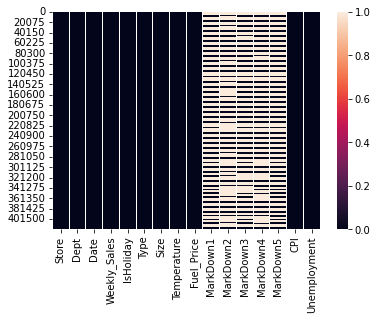

In [102]:
sns.heatmap(df.isnull())

In [103]:
#because of large null values, dropping markdown columns
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)


In [104]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106


In [105]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [106]:
#No Null Values

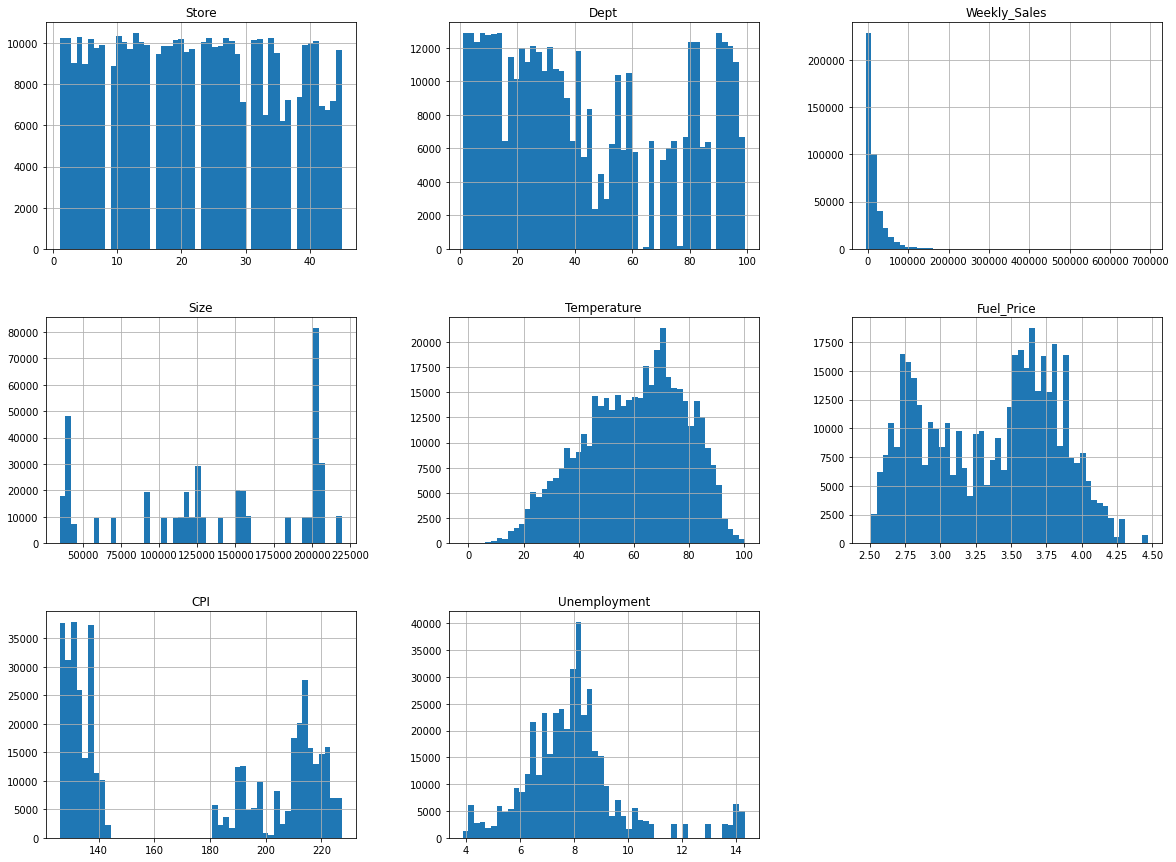

In [107]:
df.hist(figsize=(20,15),bins=50)
plt.show()

# Exploratory Data Analysis

In [108]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106


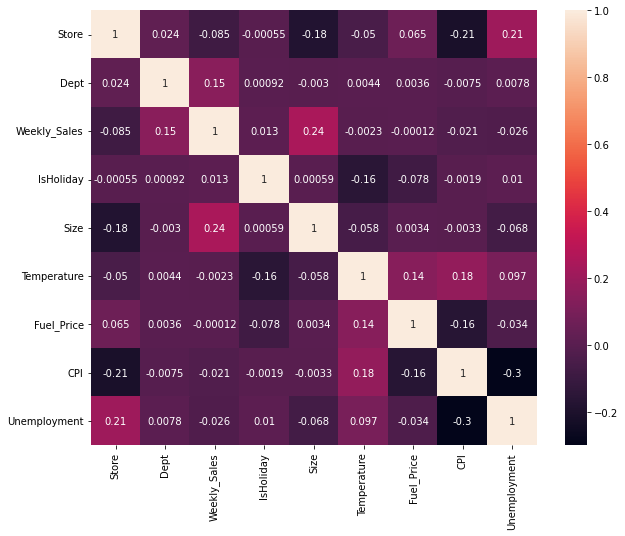

In [109]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Weekly sales and size have positive relation 
CPI and Unemployment have Negative relation


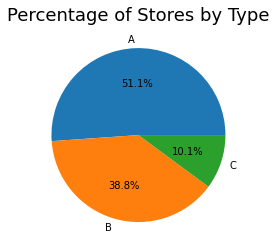

In [110]:
labels=df['Type'].value_counts().index
values=df['Type'].value_counts().values
plt.pie(values,labels=labels,autopct='%0.1f%%')
plt.title('Percentage of Stores by Type',fontsize=18)
plt.show()

Type c has the minimum number of stores while Type A has the maximum number of stores.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Size sales VS Type of stores')

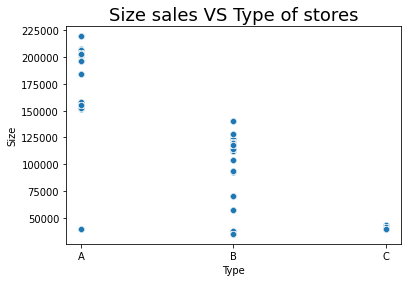

In [111]:
sns.scatterplot('Type','Size',data=df)
plt.title('Size sales VS Type of stores',fontsize=18)

Type A store is much larger compared to Type B and Type C

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average sales v/s Type of stores')

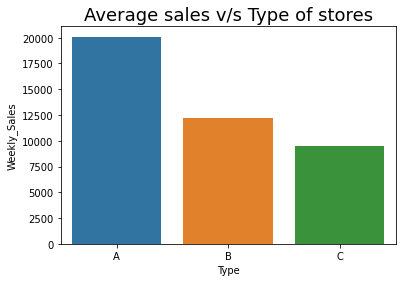

In [112]:
sns.barplot('Type','Weekly_Sales',estimator=np.mean,data=df,ci=None)
plt.title('Average sales v/s Type of stores',fontsize=18)

Type A has maximum weekly sales 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


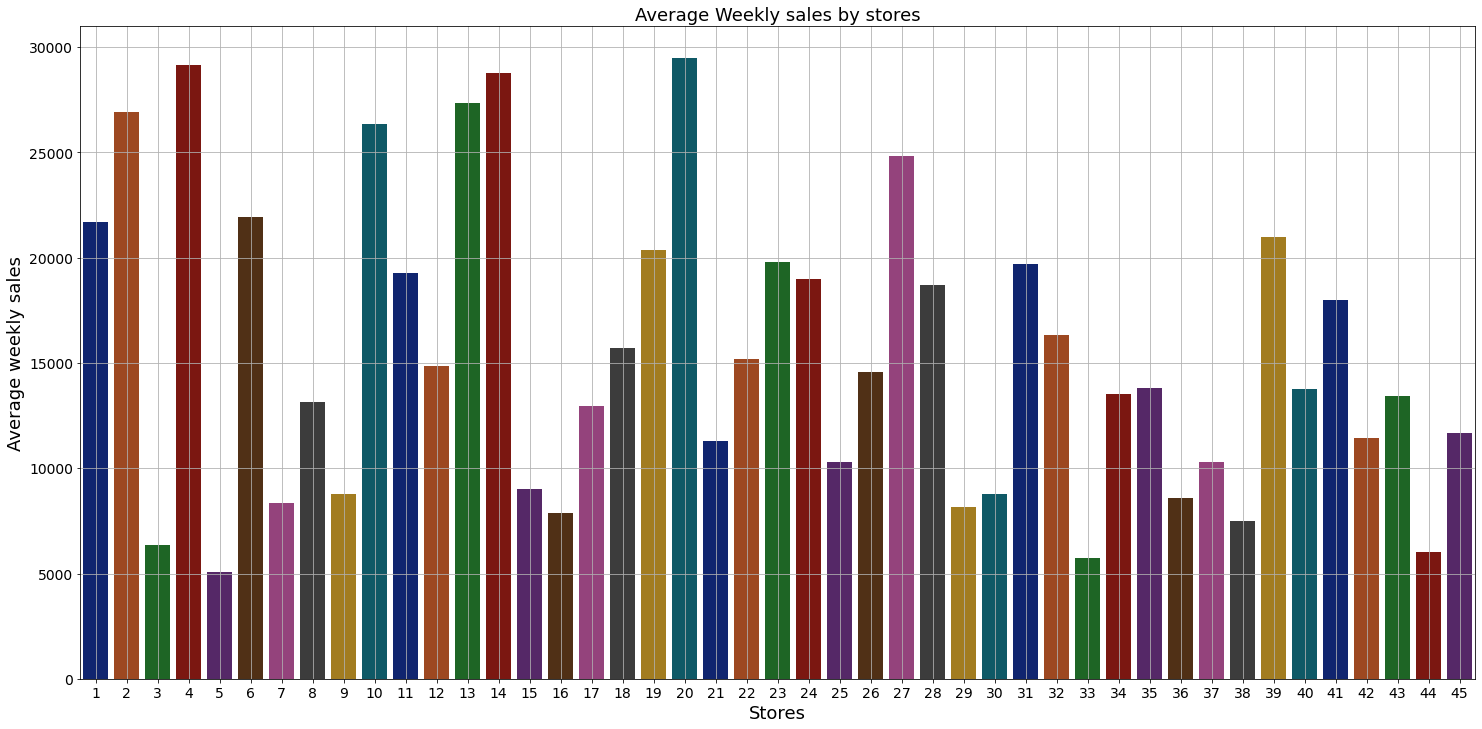

In [113]:

plt.figure(figsize=(25,12))
sns.barplot('Store','Weekly_Sales',data=df,estimator=np.mean,ci=None,palette='dark')
plt.title('Average Weekly sales by stores',fontsize=18)
plt.xlabel('Stores',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Average weekly sales',fontsize=18)
plt.grid()

Average weekly sales of store 20 is maximum and store 5 is the minimum 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


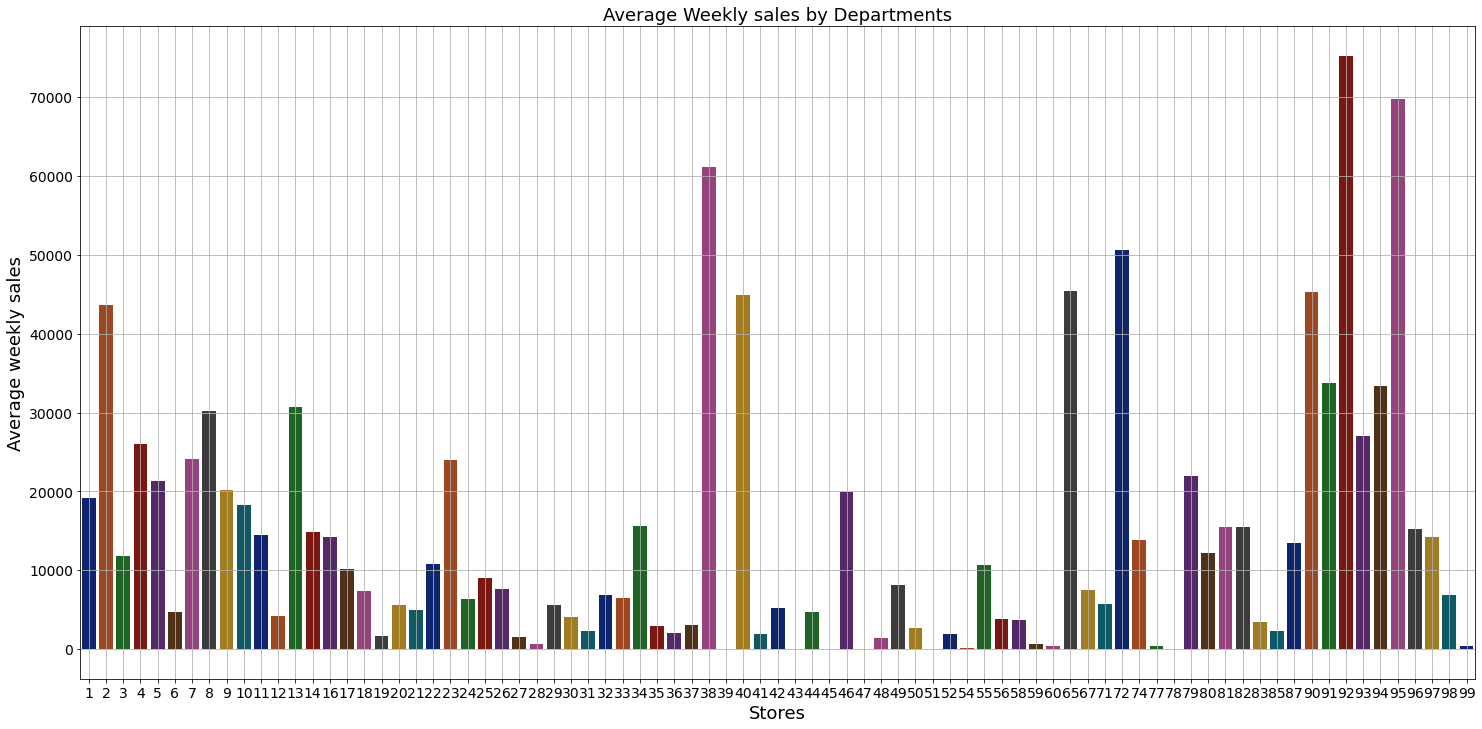

In [114]:
plt.figure(figsize=(25,12))
sns.barplot('Dept','Weekly_Sales',data=df,estimator=np.mean,ci=None,palette='dark')
plt.title('Average Weekly sales by Departments',fontsize=18)
plt.xlabel('Stores',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Average weekly sales',fontsize=18)
plt.grid()

Department number 92 shows the maximum weekly sales 


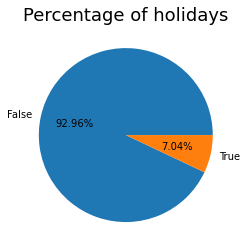

In [115]:
labels=df['IsHoliday'].value_counts().index
values=df['IsHoliday'].value_counts().values
plt.pie(values,labels=labels,autopct='%0.2f%%')
plt.title('Percentage of holidays',fontsize=18)
plt.show()

The number of working days are more compared to that of holidays

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


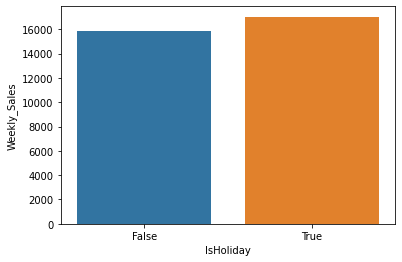

In [116]:
sns.barplot('IsHoliday','Weekly_Sales',data=df,estimator=np.mean,ci=None)

On Holydays Average sales are high

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


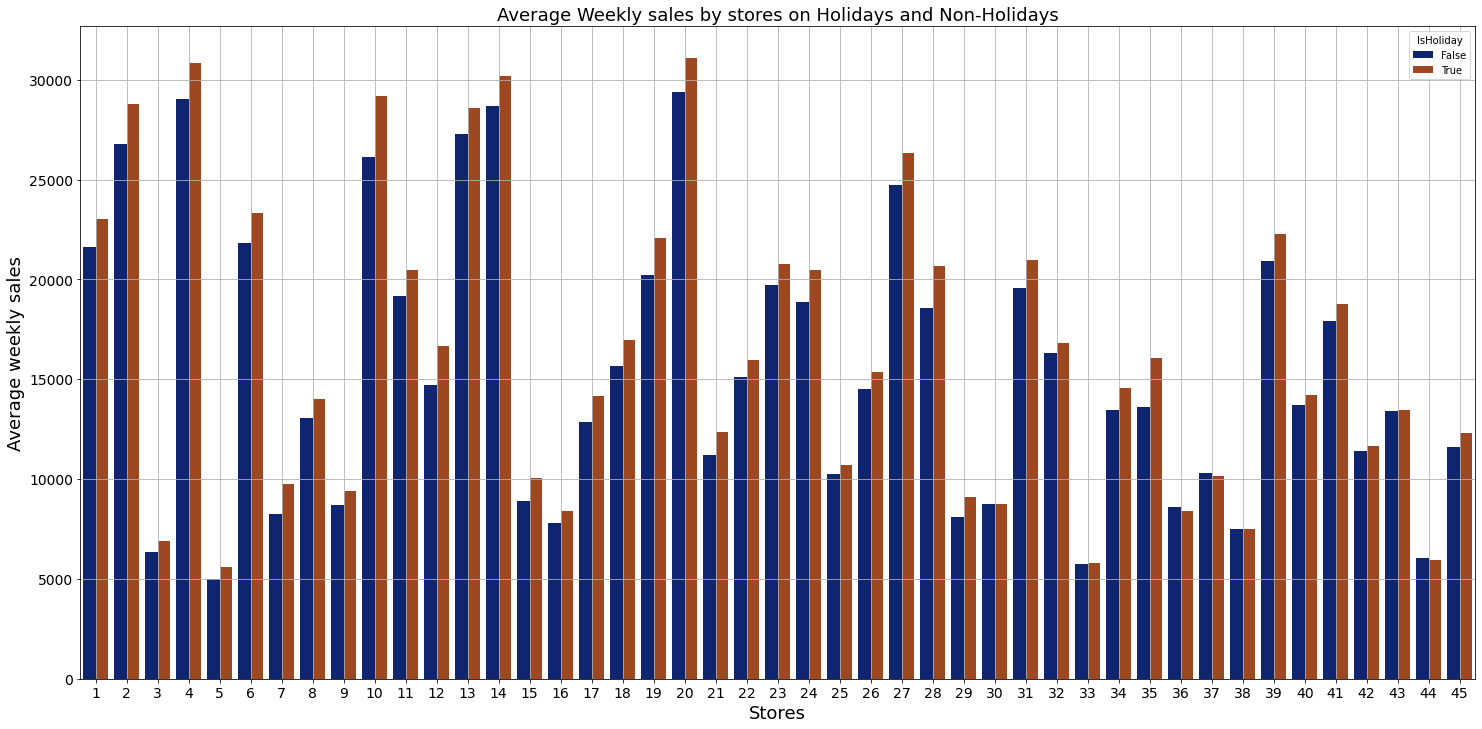

In [117]:
plt.figure(figsize=(25,12))
sns.barplot('Store','Weekly_Sales',hue='IsHoliday',data=df,estimator=np.mean,ci=None,palette='dark')
plt.title('Average Weekly sales by stores on Holidays and Non-Holidays',fontsize=18)
plt.xlabel('Stores',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Average weekly sales',fontsize=18)
plt.grid()

Average sales of each stores during holidays are higher than non holidays

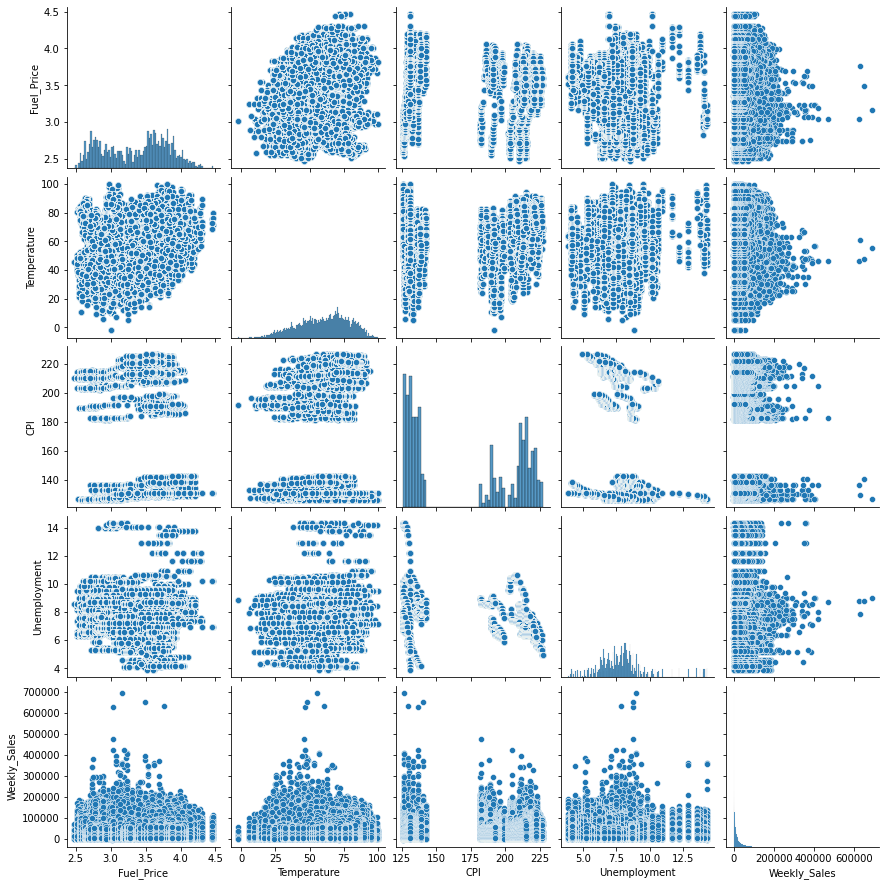

In [118]:
sns.pairplot(df[['Fuel_Price','Temperature','CPI','Unemployment','Weekly_Sales']])

Weekly sales are maximum when the price range is between  3.00 and 3.75<br>
Weekly sales are maximum when size of store is 100000 and 125000 /200000 and 225000<br> 
From the plot we can see that the area having more unemployment has less weekly sales and vice versa.<br>
Here between the temperature range 40 to 60 there is an increase in weekly sales



In [119]:
#converting date object to datetime 
df['Date']=pd.to_datetime(df['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


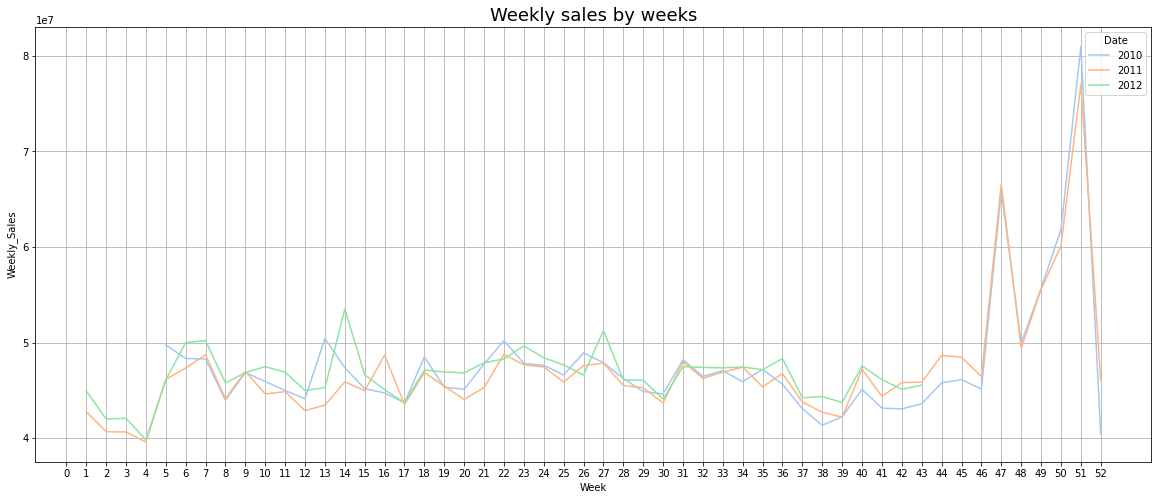

In [121]:
fig, ax = plt.subplots(figsize = (20,8))
sns.lineplot(df['Date'].dt.week,'Weekly_Sales',hue=df['Date'].dt.year,data=df,ci=None,
            estimator = np.sum,palette = 'pastel')
plt.title('Weekly sales by weeks',fontsize=18)
plt.xlabel('Week')
plt.xticks(range(53))
plt.grid()
plt.show()

From EDA we got some conclusions<br>
1.The attributes Store,Dept,Holiday,Type,Size,Temperature,Fuelprice and Unemployment are correalated to weekly sales.<br>
2.From the line graph between Week and Weekly sales, we can conclude that each an every year sales pattern is similer through the weeks.<br>

So we decided to add a week column and drop Date column

In [122]:
df['Week']=df['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [123]:
df.drop('Date',inplace=True,axis=1)
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5
1,1,2,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5
2,1,3,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5
3,1,4,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5
4,1,5,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5


# Outlier Detection

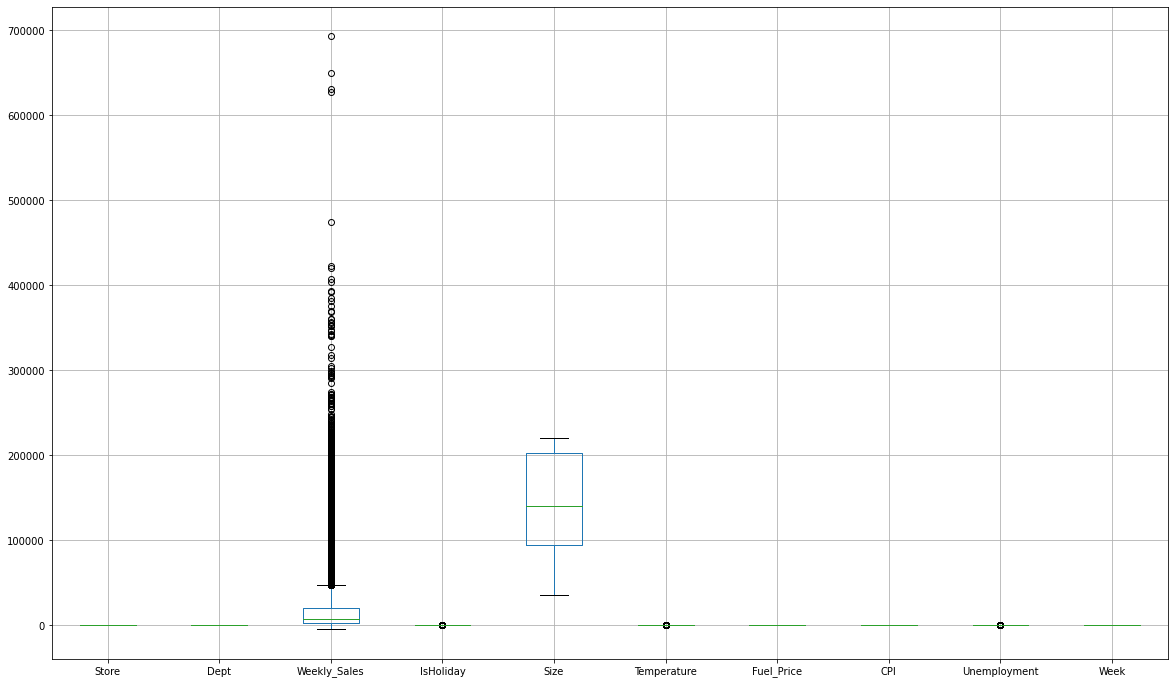

In [124]:
plt.figure(figsize=(20,12))
df.boxplot()


Outliers are detected on Weekly sales,Temperature and Unemployment atributes

In [125]:
#finding attributes having outliers
out_fut=['Weekly_Sales','Temperature','Unemployment']
out_fut

['Weekly_Sales', 'Temperature', 'Unemployment']

In [126]:
#outliers detection
def detect_outliers(data):
    out=[]
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lwr_bound=q1-(IQR*1.5)
    upper_bound=q3+(IQR*1.5)
    
    for i in data:
        if i<lwr_bound or i>upper_bound:
            out.append(i)
    return out
for i in out_fut:
    print('outliers of ',i,' attribute:',len(detect_outliers(df[i])))

outliers of  Weekly_Sales  attribute: 35521
outliers of  Temperature  attribute: 69
outliers of  Unemployment  attribute: 32114


In [127]:
#replacing the values with mean values
def handle_outliers(data):
    out=[]
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lwr_bound=q1-(IQR*1.5)
    upper_bound=q3+(IQR*1.5)
    
    b=np.where(data<lwr_bound,lwr_bound,data)
    b1=np.where(b>upper_bound,upper_bound,b)
    return b1
for i in out_fut:
    df[i]=handle_outliers(df[i])

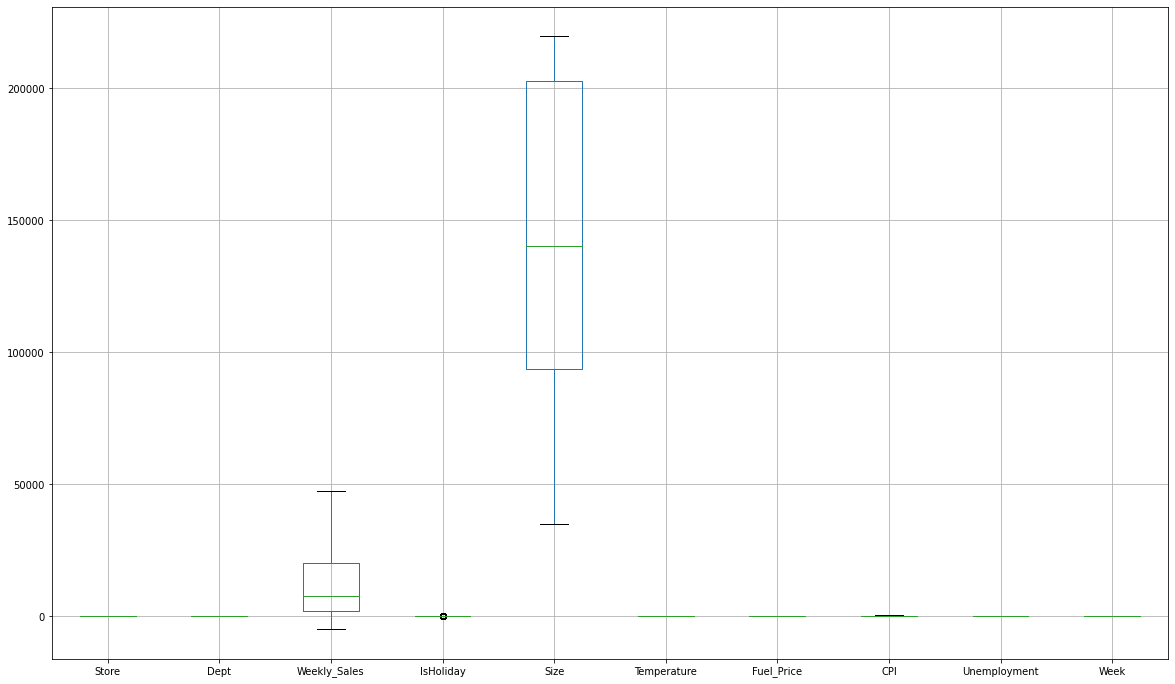

In [128]:
plt.figure(figsize=(20,12))
df.boxplot()

All outliers are removed

In [129]:
df[df.duplicated()]

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week


No duplicate rows

# Label Encoding

In [130]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
lb=LabelEncoder()
df['Type']=lb.fit_transform(df['Type'])
df['IsHoliday']=lb.fit_transform(df['IsHoliday'])
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1,1,24924.50000,0,0,151315,42.31,2.572,211.096358,8.106,5
1,1,2,47395.15625,0,0,151315,42.31,2.572,211.096358,8.106,5
2,1,3,13740.12000,0,0,151315,42.31,2.572,211.096358,8.106,5
3,1,4,39954.04000,0,0,151315,42.31,2.572,211.096358,8.106,5
4,1,5,32229.38000,0,0,151315,42.31,2.572,211.096358,8.106,5


# Feature Scaling

In [131]:
scale = StandardScaler()
df[['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment']]=scale.fit_transform(df[['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment']])
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1,1,0.756273,0,0,0.239209,-0.964062,-1.720834,1.018774,0.183066,5
1,1,2,2.263484,0,0,0.239209,-0.964062,-1.720834,1.018774,0.183066,5
2,1,3,0.006085,0,0,0.239209,-0.964062,-1.720834,1.018774,0.183066,5
3,1,4,1.764374,0,0,0.239209,-0.964062,-1.720834,1.018774,0.183066,5
4,1,5,1.246245,0,0,0.239209,-0.964062,-1.720834,1.018774,0.183066,5


# Model selection

In [132]:
from sklearn import linear_model
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble 


In [133]:
y=df['Weekly_Sales']
X=df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHoliday','Store','Dept']]

In [134]:
#train test splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [135]:
#linear regression
reg= linear_model.LinearRegression(normalize=True)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mod1_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod1_mae=metrics.mean_absolute_error(y_test,y_pred)
mod1_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod1_mse=metrics.mean_squared_error(y_test,y_pred)
mod1_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod1_r2,'%')
print('mean absolute error:',mod1_mae)
print('MAPE:',mod1_mape)
print('mean square error:',mod1_mse)
print('RMSE:',mod1_rmse)

R2 value: 2.06 %
mean absolute error: 0.8015966296936852
MAPE: 1.6132831605006621
mean square error: 0.9823183169608095
RMSE: 0.9911197288727581


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [136]:
#Ridge regression
reg=linear_model.Ridge(alpha=.5)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
mod2_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod2_mae=metrics.mean_absolute_error(y_test,y_pred)
mod2_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod2_mse=metrics.mean_squared_error(y_test,y_pred)
mod2_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod2_r2,'%')
print('mean absolute error:',mod2_mae)
print('MAPE:',mod2_mape)
print('mean square error:',mod2_mse)
print('RMSE:',mod2_rmse)

R2 value: 2.06 %
mean absolute error: 0.8015966305199622
MAPE: 1.6132830456373553
mean square error: 0.9823183177848211
RMSE: 0.9911197292884554


In [137]:
#Lasso regression
reg=linear_model.Lasso(alpha=0.1)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
                   
mod3_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod3_mae=metrics.mean_absolute_error(y_test,y_pred)
mod3_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod3_mse=metrics.mean_squared_error(y_test,y_pred)
mod3_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod3_r2,'%')
print('mean absolute error:',mod3_mae)
print('MAPE:',mod3_mape)
print('mean square error:',mod3_mse)
print('RMSE:',mod3_rmse)

R2 value: 1.76 %
mean absolute error: 0.8028430077597651
MAPE: 1.5724232803986806
mean square error: 0.9852885939256899
RMSE: 0.9926170429353356


In [138]:
#Decision tree regression
reg=tree.DecisionTreeRegressor()
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mod4_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod4_mae=metrics.mean_absolute_error(y_test,y_pred)
mod4_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod4_mse=metrics.mean_squared_error(y_test,y_pred)
mod4_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod4_r2,'%')
print('mean absolute error:',mod4_mae)
print('MAPE:',mod4_mape)
print('mean square error:',mod4_mse)
print('RMSE:',mod4_rmse)

R2 value: 96.64 %
mean absolute error: 0.08741546783428511
MAPE: 0.7661818711571782
mean square error: 0.03373664129035006
RMSE: 0.1836753693077819


In [139]:
#Gradient boosting regression
reg=ensemble.GradientBoostingRegressor(random_state=1)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mod5_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod5_mae=metrics.mean_absolute_error(y_test,y_pred)
mod5_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod5_mse=metrics.mean_squared_error(y_test,y_pred)
mod5_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod5_r2,'%')
print('mean absolute error:',mod5_mae)
print('MAPE:',mod5_mape)
print('mean square error:',mod5_mse)
print('RMSE:',mod5_rmse)

R2 value: 65.26 %
mean absolute error: 0.43664748255984387
MAPE: 2.0657791764634035
mean square error: 0.34839883062806404
RMSE: 0.5902531919677046


In [140]:
#Random forest regression
reg=ensemble.RandomForestRegressor(random_state=1)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mod6_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod6_mae=metrics.mean_absolute_error(y_test,y_pred)
mod6_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod6_mse=metrics.mean_squared_error(y_test,y_pred)
mod6_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod6_r2,'%')
print('mean absolute error:',mod6_mae)
print('MAPE:',mod6_mape)
print('mean square error:',mod6_mse)
print('RMSE:',mod6_rmse)

R2 value: 98.07 %
mean absolute error: 0.0699030701018029
MAPE: 0.5460031363145113
mean square error: 0.019385652069395416
RMSE: 0.1392323671758669


In [141]:
r2=[mod1_r2,mod2_r2,mod3_r2,mod4_r2,mod5_r2,mod6_r2]
mae=[mod1_mae,mod2_mae,mod3_mae,mod4_mae,mod5_mae,mod6_mae]
mape=[mod1_mape,mod2_mape,mod3_mape,mod4_mape,mod5_mape,mod6_mape]
mse=[mod1_mse,mod2_mse,mod3_mse,mod4_mse,mod5_mse,mod6_mse]
rmse=[mod1_rmse,mod2_rmse,mod3_rmse,mod4_rmse,mod5_rmse,mod6_rmse]
reg=['Linear regression','Ridge regression','Lasso regression','Decision tree regression','Gradient boosting regression','Random forest regression']

# R2 value comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


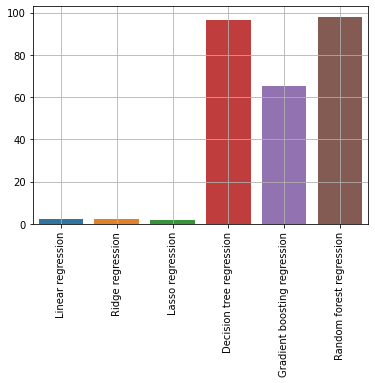

In [142]:
sns.barplot(reg,r2)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Random forest regression have high r2 value

# Mean Absolute Error comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


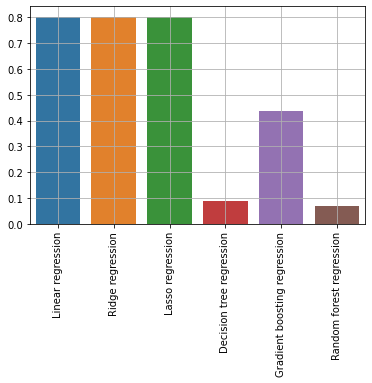

In [143]:
sns.barplot(reg,mae)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Random forest regression have low value of MAE

# Mean Absolute Percentage Error comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


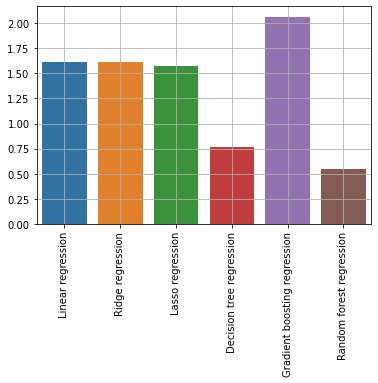

In [144]:
sns.barplot(reg,mape)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Random forest regression have low value of MAPE

# Mean Squared Error comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


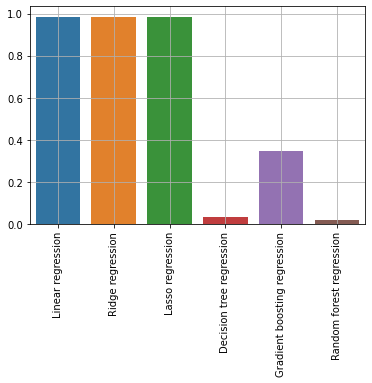

In [145]:
sns.barplot(reg,mse)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Random forest regression have low value of MSE

# Root Mean Squared Error comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


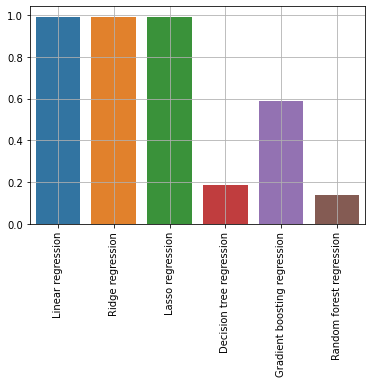

In [146]:
sns.barplot(reg,rmse)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Random forest regression have low value of RMSE

# From these comparison we can conclude that Random forest regression have high r2 value and low MSE,RMSE,MAE and MAPE values. So Random forest regression is best model

# Comparison of predicted and actual weekly sales values from Random forest regression model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


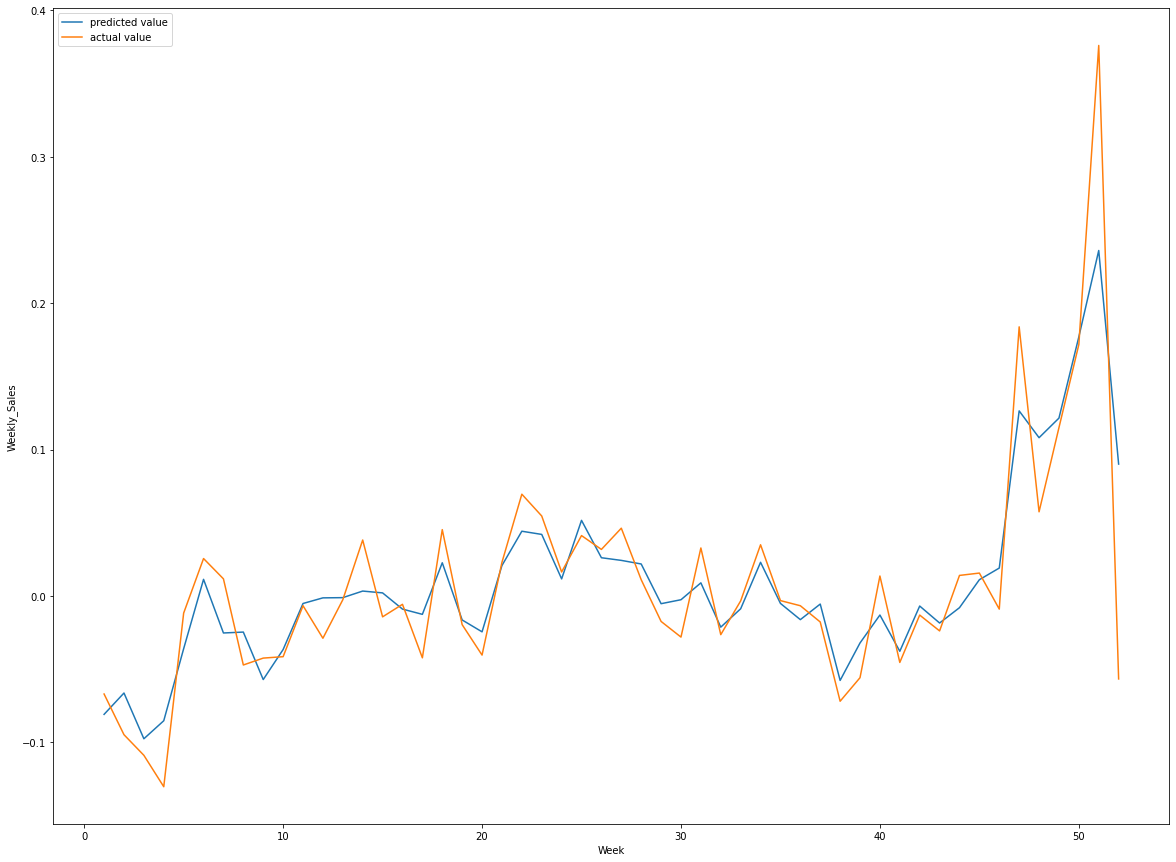

In [147]:

plt.figure(figsize=(20,15))
sns.lineplot(X_test.Week,y_pred,err_style=None)
sns.lineplot(X_test.Week,y_test,err_style=None)
plt.legend(labels=["predicted value","actual value"])